In [111]:
#Import Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import patheffects
import geopandas
import os

# Import the API key
from config import geoapify_key

In [112]:
# Study data files
russia_alcohol = "Data/russia_alcohol.csv"
unemployment_data = "Data/unemployment_data.csv"
russia_lat_lon_data = "Data/russian_geo.csv"
# Read CSV
alc_df = pd.read_csv(russia_alcohol)
unemp_df = pd.read_csv(unemployment_data)
russia_df = pd.read_csv(russia_lat_lon_data)

In [93]:
alc_df

,year,region,wine,beer,vodka,champagne,brandy
0,1998,Republic of Adygea,1.9,8.8,3.4,0.3,0.1
1,1998,Altai Krai,3.3,19.2,11.3,1.1,0.1
2,1998,Amur Oblast,2.1,21.2,17.3,0.7,0.4
3,1998,Arkhangelsk Oblast,4.3,10.6,11.7,0.4,0.3
4,1998,Astrakhan Oblast,2.9,18.0,9.5,0.8,0.2
...,...,...,...,...,...,...,...
1610,2016,Chuvash Republic,5.0,42.3,7.7,0.7,0.4
1611,2016,Chukotka Autonomous Okrug,3.9,34.0,11.6,1.8,1.1
1612,2016,Sakha (Yakutia) Republic,4.3,56.1,8.2,1.8,0.5
1613,2016,Yamalo-Nenets Autonomous Okrug,4.5,75.8,8.2,1.7,1.3


In [94]:
unemp_df

,DATE,LMUNRRTTRUM156S
0,1991-07-01,0.061257
1,1991-08-01,0.087441
2,1991-09-01,0.151525
3,1991-10-01,0.148993
4,1991-11-01,0.132976
...,...,...
361,2021-08-01,1.222273
362,2021-09-01,1.128009
363,2021-10-01,1.115060
364,2021-11-01,1.099981


In [106]:
# cleaning data
# renaming column and averaging months into year
# Study data files
clean_unemp = unemp_df.rename(columns={"LMUNRRTTRUM156S": "Max Unemployment Rate"})

clean_unemp = clean_unemp.groupby(pd.PeriodIndex(clean_unemp['DATE'], freq="Y"))['Max Unemployment Rate'].mean()

# change null values to 0
clean_alc = alc_df.dropna()
# add in a total per region
clean_alc["Total"] = clean_alc["wine"] + clean_alc["beer"] + clean_alc["vodka"] + clean_alc["champagne"] + clean_alc["brandy"]
clean_alc

/var/folders/t8/c0vc3sw57hjf418ph0zw30n40000gn/T/ipykernel_96947/3542600379.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_alc["Total"] = clean_alc["wine"] + clean_alc["beer"] + clean_alc["vodka"] + clean_alc["champagne"] + clean_alc["brandy"]


,year,region,wine,beer,vodka,champagne,brandy,Total
0,1998,Republic of Adygea,1.9,8.8,3.4,0.3,0.1,14.5
1,1998,Altai Krai,3.3,19.2,11.3,1.1,0.1,35.0
2,1998,Amur Oblast,2.1,21.2,17.3,0.7,0.4,41.7
3,1998,Arkhangelsk Oblast,4.3,10.6,11.7,0.4,0.3,27.3
4,1998,Astrakhan Oblast,2.9,18.0,9.5,0.8,0.2,31.4
...,...,...,...,...,...,...,...,...
1610,2016,Chuvash Republic,5.0,42.3,7.7,0.7,0.4,56.1
1611,2016,Chukotka Autonomous Okrug,3.9,34.0,11.6,1.8,1.1,52.4
1612,2016,Sakha (Yakutia) Republic,4.3,56.1,8.2,1.8,0.5,70.9
1613,2016,Yamalo-Nenets Autonomous Okrug,4.5,75.8,8.2,1.7,1.3,91.5


In [97]:
clean_unemp

DATE
1991    0.113651
1992    0.367500
1993    0.991667
1994    1.733333
1995    2.816667
1996    3.516667
1997    3.150000
1998    2.575000
1999    2.158333
2000    1.483333
2001    1.458333
2002    1.875000
2003    2.175000
2004    2.275000
2005    2.516667
2006    2.375000
2007    2.100000
2008    1.841667
2009    2.758333
2010    2.483333
2011    1.894612
2012    1.512149
2013    1.280355
2014    1.155799
2015    1.263890
2016    1.248050
2017    1.072370
2018    0.936417
2019    0.974480
2020    3.162817
2021    1.765315
Freq: A-DEC, Name: Max Unemployment Rate, dtype: float64

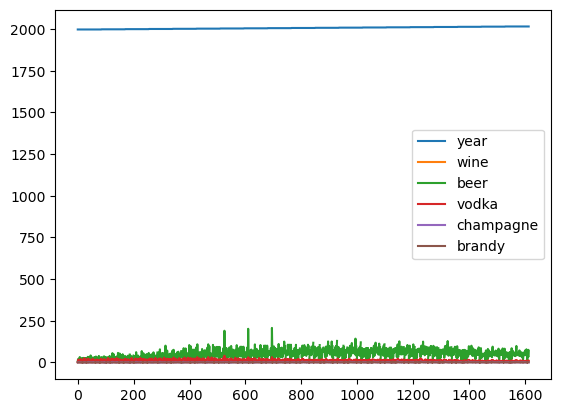

In [131]:
alc_russia = alc_df.plot()

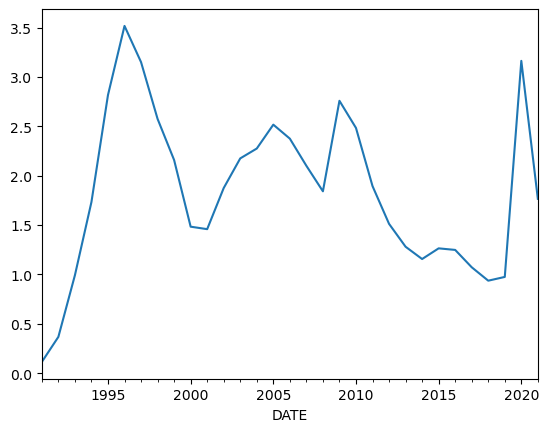

In [133]:
unemp_world = clean_unemp.plot()

In [134]:
russia_df 


,region,lat,lon
0,Republic of Adygea,44.693901,40.152042
1,Komi Republic,63.988142,54.332607
2,Sverdlovsk Oblast,58.641475,61.802155
3,Sakhalin Oblast,49.721967,143.448533
4,Saratov Oblast,51.652056,46.863195
...,...,...,...
80,Kirov Oblast,57.966559,49.407460
81,Kemerovo Oblast,54.235332,85.378501
82,Republic of Karelia,62.619403,33.492027
83,Karachay-Cherkess Republic,43.736833,41.726799


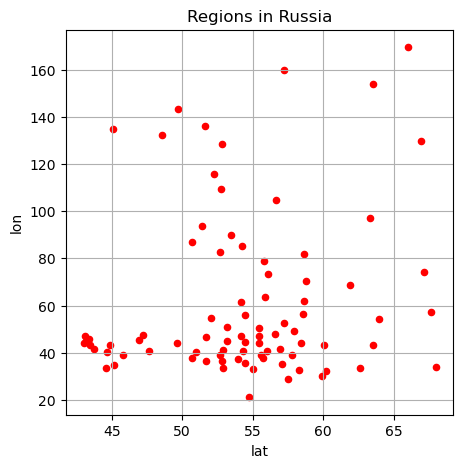

In [140]:
russia_df.plot(x="lat", y="lon", title="Regions in Russia", kind="scatter", grid=True,
               c="r", figsize=(5,5))

plt.show()


In [127]:
clean_alc.describe()

,year,wine,beer,vodka,champagne,brandy,Total
count,1549.000000,1549.000000,1549.000000,1549.000000,1549.000000,1549.000000,1549.000000
mean,2007.019367,5.638528,51.517205,11.854939,1.315526,0.526998,70.853196
std,5.489208,2.806004,25.183890,5.097104,0.796938,0.400201,28.789302
min,1998.000000,0.100000,1.000000,0.400000,0.100000,0.000000,3.800000
25%,2002.000000,3.600000,32.600000,8.400000,0.800000,0.200000,50.500000
50%,2007.000000,5.400000,50.100000,11.500000,1.200000,0.400000,69.600000
75%,2012.000000,7.400000,67.500000,15.000000,1.680000,0.700000,88.400000
max,2016.000000,18.100000,207.300000,40.600000,5.560000,2.300000,257.100000
